first 5 rows of dataset:
     Car_ID     Brand  Manufacture_Year  Body_Type Fuel_Type Transmission  \
0  CAR_0001  Mercedes              2006        SUV    Petrol       Manual   
1  CAR_0002    Nissan              2023      Coupe    Petrol    Automatic   
2  CAR_0003    Nissan              2007  Hatchback    Diesel       Manual   
3  CAR_0004    Nissan              2013      Coupe    Petrol       Manual   
4  CAR_0005   Hyundai              2009  Hatchback    Hybrid    Automatic   

   Engine_CC  Horsepower  Mileage_km_per_l  Price_USD Manufacturing_Country  
0       4089         547                17      73407                   USA  
1       4618         167                25      79370                   USA  
2       1802         110                16      76549                 China  
3       1835         373                16      48722                   USA  
4       2332         145                28      83265                    UK  

dataset information:
<class 'pandas.core.fr

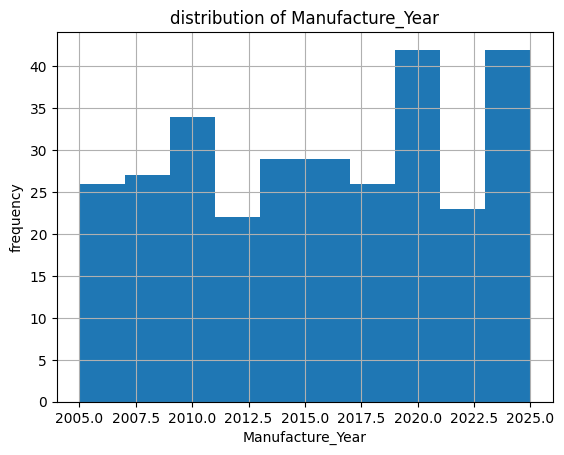

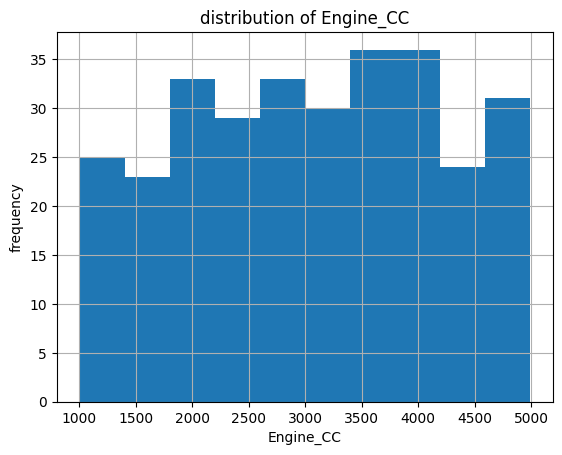

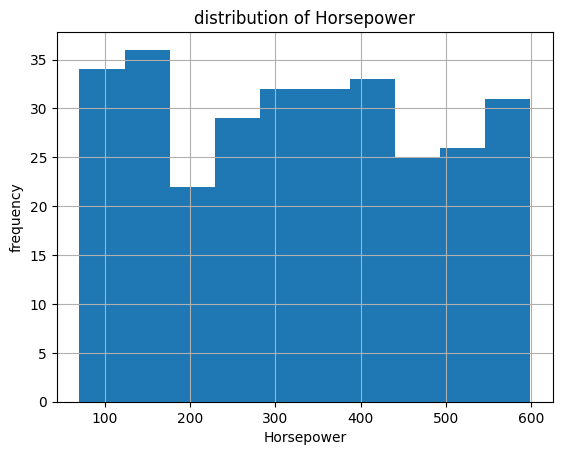

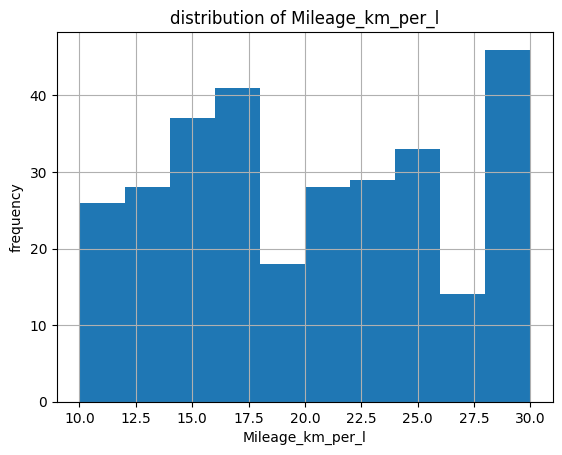

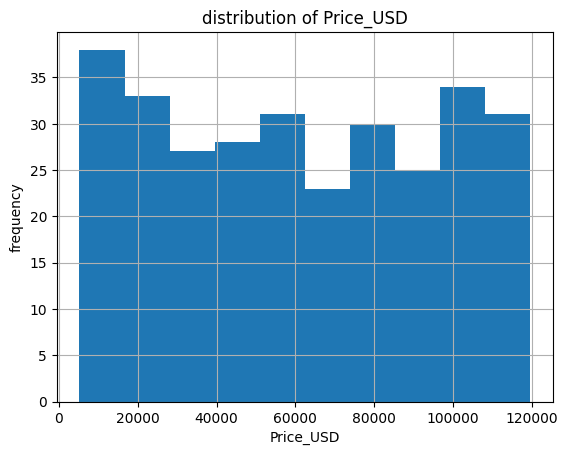

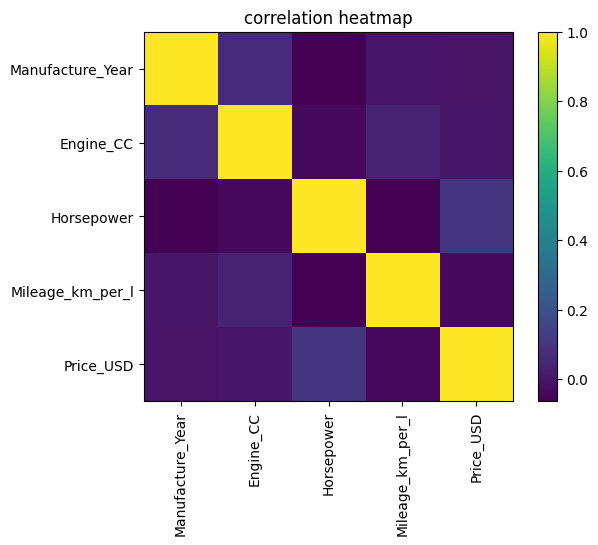


correlation with target (Price_USD):
Price_USD           1.000000
Horsepower          0.104940
Engine_CC          -0.000749
Manufacture_Year   -0.005602
Mileage_km_per_l   -0.035517
Name: Price_USD, dtype: float64


In [4]:
# part a: exploratory data analysis (eda)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. load the dataset and display basic information
df = pd.read_csv("global_cars_dataset_synthetic.csv")

print("first 5 rows of dataset:")
print(df.head())

print("\ndataset information:")
print(df.info())

# 2. compute summary statistics
print("\nsummary statistics:")
print(df.describe())

# 3. check missing values
print("\nmissing values in each column:")
print(df.isnull().sum())

# check outliers using iqr method for numeric columns
print("\noutlier detection using iqr method:")

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

# 4. plot feature distributions (histograms)
for col in numeric_cols:
    plt.figure()
    df[col].hist()
    plt.title(f"distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

# correlation heatmap (for regression analysis)
plt.figure()
correlation_matrix = df[numeric_cols].corr()

plt.imshow(correlation_matrix)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("correlation heatmap")
plt.colorbar()
plt.show()

# show correlation with target variable (important for regression)
print("\ncorrelation with target (Price_USD):")
print(correlation_matrix["Price_USD"].sort_values(ascending=False))
